#  Morphological smoothing example

* Shows how to smooth a binary image using morphological operations
* Smoothing is performed in 3D

## Initialization

All cells from this section have to be executed every time this notebook is started.

In [1]:
import sys
import os
import itertools
import pathlib

import numpy as np
import scipy as sp
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pyto

from common import show_2d_slices 

# convenience
%autosave 0
sys.version

Autosave disabled


'3.13.3 | packaged by conda-forge | (main, Apr 14 2025, 20:44:03) [GCC 13.3.0]'

In [2]:
# Settings

# force showing all rows in a table (default 60 rows)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# set hostname
hostname = os.uname()[1]
print(f"Host: {hostname}")

Host: rauna


### Definitions

In [3]:
def morphology_pipe(image, operations, erosion_border=1, multiply=None):
    """Applies a series of binary morphological operations.

    Currently implemented for erosion in dilation only.

    Uses scipy.ndimage.binary_erosion() and scipy.ndimage.binary_dilation().
    
    Arguments:
      - image: (np.ndimage) input image
      - operations: (str or list of chars) series of morphological operators, 
        currently implemented 'e' for erosion and 'd' for dilation,
        in the order they should be applied
      - erosion_border: border valus used for erosion (passed directly
        to scipy.ndimage.binary_erosion(), arg border_value, default 1)
      - mutiply: if not None, the returned image is obtained by multiplying
        the processed image by this factor and adding the input image  
        (default None)

    Returns:
      - If arg multiply is None: processed image
      - If arg multiply is not None: 
          multiply * processed_image + image
    """

    image_loc = image.copy()
    for op in operations:
        if op == 'e':
            image_loc = sp.ndimage.binary_erosion(
                image_loc, border_value=erosion_border)
        elif op == 'd':
            image_loc = sp.ndimage.binary_dilation(
                image_loc, border_value=0)

    if multiply is not None:
        image_loc = image + multiply*image_loc

    return image_loc


## Make an input image for smoothing

* Makes a binned segmented region-like image
* Expands the image by unbinning to get an input image for smoothing
* Saves and shows the input image 

Has to be executed the first time to generate the input image.

Wrote image smooth/region.mrc


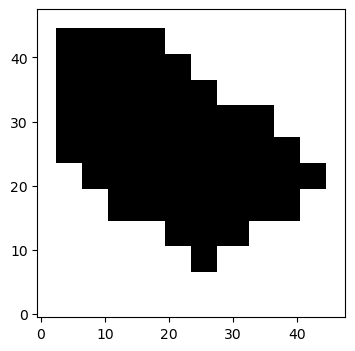

In [4]:
# Generate, save and show input image

# binning factir for the input image
unbin_factor = 4

# input image path
input_path = 'smooth/region.mrc'

# make a binned image
center = np.array([
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
im_bin = np.zeros((12, 12, 5), dtype=int)
for z_val in range(im_bin.shape[2]):
    im_bin[1:11, 1:11, z_val] = center
im_init = sp.ndimage.zoom(im_bin, zoom=unbin_factor, order=0)

# save as mrc
image = pyto.segmentation.Labels(data=im_init)
image.write(file=input_path, dataType='int16')
print(f"Wrote image {input_path}")

# show
fig, axes = show_2d_slices(
    image=im_init[:, :, 2:3], vmin=0, vmax=1, figheight=4)


## Smooth image

Shows actual smoothing by morphological operations

Can be executed multiple mtimes for different parameters

In [5]:
# Read image
#
# It is possible to read the image generated above, or any other binary mrc
# image that contains a region to be smoothed

# path to the image that is to be smoothed
image_path = 'smooth/region.mrc'

image = pyto.segmentation.Labels.read(file=image_path)
print(f"Read image {image_path}")

Read image smooth/region.mrc


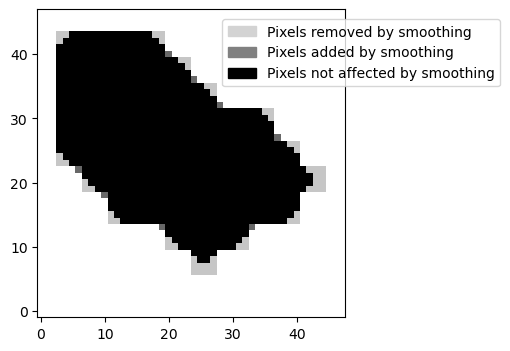

In [14]:
# Smooth image

# morphological operations sequence
operations = 'eeddddee'

# determines how the initial and the smoothed image are combined
# for visualization (recommended 2-4)
display_factor = 2

# smooth
im_smooth = morphology_pipe(
    image=image.data, operations=operations, multiply=display_factor)

# show entire slice
fig, axes = show_2d_slices(
    image=im_smooth[:, 1:, 1:2], vmin=0, vmax=display_factor+1, figheight=4)
handles, labels = axes.get_legend_handles_labels()
patch = mpatches.Patch(color='lightgrey', label='Pixels removed by smoothing')
handles.append(patch) 
patch = mpatches.Patch(color='grey', label='Pixels added by smoothing')
handles.append(patch) 
patch = mpatches.Patch(color='black', label='Pixels not affected by smoothing')
handles.append(patch) 
axes.legend(handles=handles, loc=(0.6, 0.75));

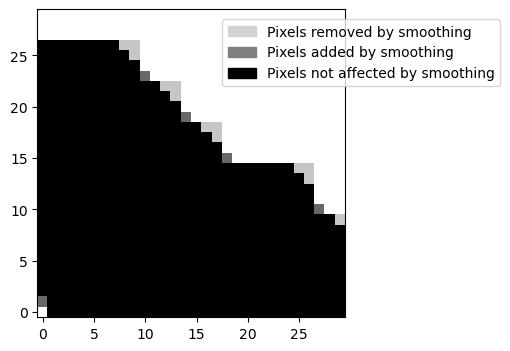

In [15]:
# zoom in to show detail
fig, axes = show_2d_slices(
    image=im_smooth[10:40, 18:, 1:2], vmin=0, vmax=display_factor+1, figheight=4)
handles, labels = axes.get_legend_handles_labels()
patch = mpatches.Patch(color='lightgrey', label='Pixels removed by smoothing')
handles.append(patch) 
patch = mpatches.Patch(color='grey', label='Pixels added by smoothing')
handles.append(patch) 
patch = mpatches.Patch(color='black', label='Pixels not affected by smoothing')
handles.append(patch) 
axes.legend(handles=handles, loc=(0.6, 0.75));

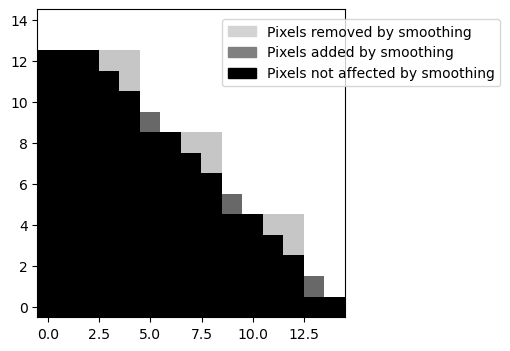

In [17]:
# further zoom in
fig, axes = show_2d_slices(
    image=im_smooth[15:30, 32:47, 1:2], vmin=0, vmax=display_factor+1, figheight=4)
handles, labels = axes.get_legend_handles_labels()
patch = mpatches.Patch(color='lightgrey', label='Pixels removed by smoothing')
handles.append(patch) 
patch = mpatches.Patch(color='grey', label='Pixels added by smoothing')
handles.append(patch) 
patch = mpatches.Patch(color='black', label='Pixels not affected by smoothing')
handles.append(patch) 
axes.legend(handles=handles, loc=(0.6, 0.75));

In [13]:
# Save smoothed image

# smoothed image path
smoothed_path = 'smooth/smooth.mrc'

# save as mrc
image = pyto.segmentation.Labels(data=im_smooth)
image.write(file=smoothed_path, dataType='int16')
print(f"Wrote image {smoothed_path}")

Wrote image smooth/smooth.mrc
